#PREDICTION USING SUPERVISED ML
OBJECTIVE


> *Predict the score of a student based on the no. of study hours*








SIMPLE LINEAR REGRESSION

> *Linear Regression is a way to explain the relationship between dependent variable and one or more explanatory variable using a straight line.*

> y = mx + c

*   y - criterion variable
*   x - predictor variable
*   c - constant/intercept
*   m - regression coefficient

---


















 
 Author ~ *Aswathy Chandrasekar*
 
 ---

###- *Importing Libraries*

In [2]:
## Importing required libraries

import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### - *Load Dataset*

In [3]:
## Loading dataset
url = 'http://bit.ly/w-data'
data = pd.read_csv(url) 

### - *Summarize Dataset*

In [4]:
#Retrieves the first five records from the dataset. 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Retrieves the last five records from the dataset. 
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### - *Basic Exploratory Data Analysis (EDA)*

In [6]:
#returns the total number of rows and columns
data.shape

(25, 2)

In [7]:
# returns the column attributes
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# returns the datatypes 
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
# returns the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#returns the statistical info.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [11]:
#Checks for null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
#Checks for duplicates values if any
data.duplicated().sum()

0

*From the above, it's clear that there are no NULL and DUPLICATE values and hence we can interpret that the given dataset is clean.*

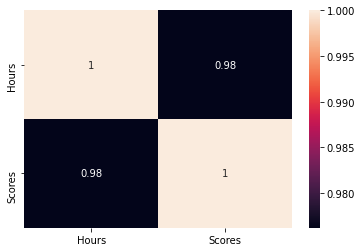

In [13]:
sns.heatmap(data.corr(),annot=True)


*From the Heatmap, it is clear that there exists high positive corelation between the varibles.* 

### - *Data Visualization*

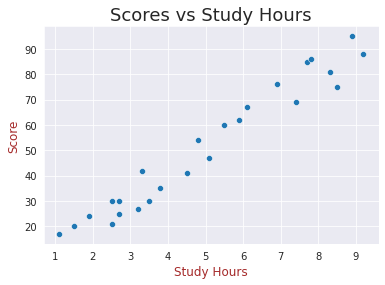

In [38]:
sns.set_style('darkgrid')
sns.scatterplot(x = data['Hours'], y = data['Scores'])
plt.title('Scores vs Study Hours', size = 18)
plt.ylabel('Score', size = 12, color = 'brown')
plt.xlabel('Study Hours', size = 12, color = 'brown')
plt.show()

*From the above scatter plot, it is clear that there is a linear relationship between Study hours and Scores. Hence we can interpret that we can implement a regression model.*

### - *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [15]:
X= data.iloc[:, :-1].values  
Y =data.iloc[:, -1].values

### - *Splitting Dataset into Train & Test*

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

### - *Model Building*




In [17]:
model = LinearRegression()  
model.fit(X_train, y_train)
print('-- MODEL TRAINED --')

-- MODEL TRAINED --


In [41]:
# Intercept and slope of the regrssion line
print('Intercept: ',model.intercept_)
print('Coefficient: ', model.coef_[0])

Intercept:  2.018160041434662
Coefficient:  9.91065648064224


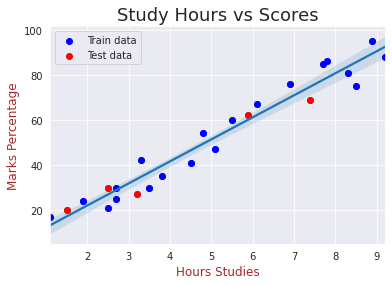

In [19]:
#Regression Plot
sns.regplot(x = data['Hours'], y = data['Scores'])
plt.scatter(X_train, y_train, label = "Train data", color = 'blue')
plt.scatter(X_test, y_test, label = "Test data", color = 'red')
plt.title('Study Hours vs Scores', size = 18)
plt.ylabel('Marks Percentage', size = 12, color = 'brown')
plt.xlabel('Hours Studies', size = 12, color = 'brown')
plt.grid(True)
plt.legend()
plt.show()

*From the above graph, it is confirmed that the variables are positively correlated.*


### - *Prediction for all Test Data*

In [20]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [x for x in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### - *Comparison between Actual Marks and Predicted marks*

In [21]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred,'Varience': y_test-y_pred})
compare

,Actual Marks,Predicted Marks,Varience
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### - *Visualization of the Compared Data*

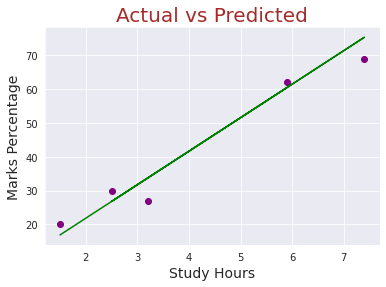

In [37]:
plt.scatter( x = X_test,y= y_test, color = 'purple')
plt.plot(X_test, y_pred, color = 'green')
plt.title('Actual vs Predicted', size = 20, color = 'brown')
plt.ylabel('Marks Percentage', size = 14)
plt.xlabel('Study Hours', size = 14)
plt.show()

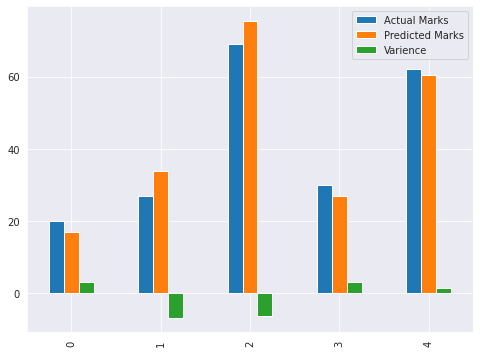

In [ ]:
#plotting actual v/s predicted
compare.plot(kind = 'bar', figsize = (8, 6))
plt.show()

### - *Evaluating the Model*

In [ ]:
#Calculating the accuracy of the model
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  4.183859899002982


*The smaller the mean absolute error value, the lesser the chance of error or wrong forecasting through the model.*

### - *What will be the predicted score if a student studies for 9.25 hrs/ day?*

In [ ]:
hours = [9.25]
result = model.predict([hours])
print('Predicted Score: {}'.format(round(result[0], 2)))

Predicted Score: 93.69





*   ### *Hence, if a student studies for 9.25 hrs/ day, he/she is likely to score 93.69 marks.*


 




